In [2]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import src.MonteCarlo as mc
import src.interaction
import src.system as sys

In [3]:
def plot_val_over_NMC(val,figname="awa.png"):

    x = np.linspace(0,len(val),len(val))

    plt.figure()
    plt.plot(x,val,label=f'average={np.average(val):.3}')
    plt.legend()
    plt.grid()
    # plt.savefig(figname)

In [4]:
temperature = 2.                                    # Temperatures
M = 6                                              # Cells per side
a = 1.0                                             # Lattice spacing
sigma = 1.0                                         # Unità di misura di lunghezza
epsilon = 1.0                                       # Unità di misura di energia

box = M*a                                           # Grandezza della scatola 
N = M**3                                            # Numero di siti per scatola
rcut_over_sigma = 2.5                               # Distanza di taglio per il potenziale cut and shift

parameters = dict(sigma=sigma,epsilon=epsilon,rcut=rcut_over_sigma*sigma)

# burnin = int(5e4)
# N_MC = int(1e5)
burnin = int(2e4)
N_MC = int(5e4)


densities = [0.05*(k+1) for k in range(20)]
# densities = [0.75]

In [45]:
P = []
E = []
pressures = []
energies = []

interaction = src.interaction.Interaction(parameters,which_potential='lj')#,flags='-fbounds-check')

# for density in densities:
for k in range(np.size(densities)):
    density = densities[k]
    # mc_parameter = mc_parameters[k]

    my_sys = sys.System(temperature,interaction,M=M,a=a,config='crystal')
    my_sys.density = density
    montecarlo = mc.MonteCarlo(my_sys,interaction)
    rnd.seed(0)
    mc_parameter = 0.4/11*my_sys.box[0]

###############################################
# run montecarlo until burnin without saving values
    for _ in range(burnin):
        montecarlo.run(mc_parameter)
        # P.append(my_sys.pressure)
        # E.append(my_sys.energy)

    # reset acceptance ratio 
    temp_accep_ratio = montecarlo.accept_ratio
    montecarlo.n_accepted_moves = 0
    montecarlo.n_mc_moves = 0

    # run montecarlo until end of simulation and save every 100 mc cycles
    for i in range(int(N_MC-burnin)):
        montecarlo.run(mc_parameter)
        if i//100 == i/100:
            P.append(my_sys.pressure)
            E.append(my_sys.energy)
    
    pressures.append(np.average(P))
    energies.append(np.average(E))
    

# PRINT MESSAGE
    print(f"For density {density:.2}, accept ratio: {temp_accep_ratio:.2}->{montecarlo.accept_ratio:.2}, "+
        f"Energy={energies[-1]:.2}, Pressure={pressures[-1]:.2}")


For density 0.05, accept ratio: 0.91->0.91, Energy=-0.27, Pressure=0.096
For density 0.1, accept ratio: 0.87->0.86, Energy=-0.41, Pressure=0.14
For density 0.15, accept ratio: 0.85->0.84, Energy=-0.54, Pressure=0.19
For density 0.2, accept ratio: 0.82->0.81, Energy=-0.67, Pressure=0.23
For density 0.25, accept ratio: 0.79->0.78, Energy=-0.8, Pressure=0.28
For density 0.3, accept ratio: 0.77->0.77, Energy=-0.93, Pressure=0.32
For density 0.35, accept ratio: 0.75->0.74, Energy=-1.1, Pressure=0.38
For density 0.4, accept ratio: 0.73->0.72, Energy=-1.2, Pressure=0.44
For density 0.45, accept ratio: 0.7->0.7, Energy=-1.3, Pressure=0.51
For density 0.5, accept ratio: 0.68->0.67, Energy=-1.4, Pressure=0.59
For density 0.55, accept ratio: 0.65->0.65, Energy=-1.6, Pressure=0.69
For density 0.6, accept ratio: 0.63->0.63, Energy=-1.7, Pressure=0.81
For density 0.65, accept ratio: 0.6->0.6, Energy=-1.8, Pressure=0.96
For density 0.7, accept ratio: 0.57->0.57, Energy=-1.9, Pressure=1.1
For density 

-4.407307645902449


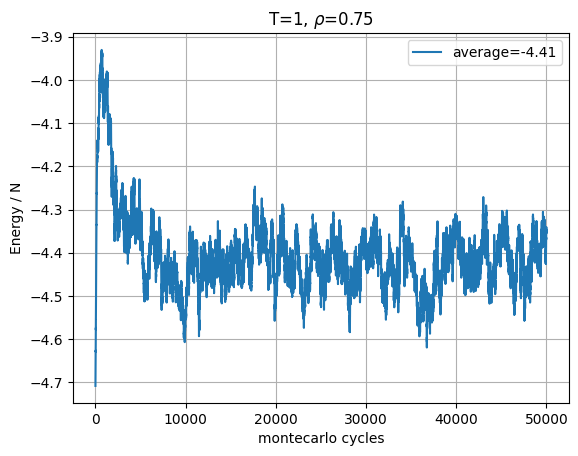

In [ ]:
# thig graph is for T=1, density=0.75, N_MC=5e4, all points have been saved sice cycle 1
plot_val_over_NMC(E)
plt.xlabel('montecarlo cycles')
plt.ylabel('Energy / N')
plt.title(r'T=1, $\rho$=0.75')
print(np.average(E))

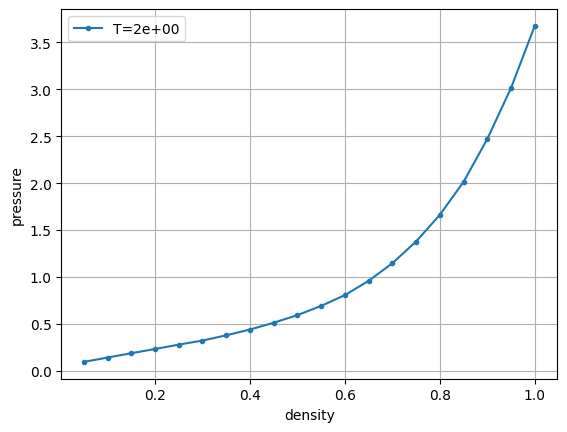

In [49]:
# this graph is for T=2, N_MC=5e4, 
# for every density, the value of energy is saved every 100 MC cycles after the burn-in time 
# (N_MC=5e4, burnin=2e4)
plt.plot(densities,pressures,'.-',label=f'T={temperature:.1}')
plt.xlabel('density')
plt.ylabel('pressure')
plt.legend()
plt.grid()
with open('EOS_T2.txt','w') as f:
    for i in range(len(densities)):
        f.write(f'{densities[i]:8.3}{pressures[i]:12.4}\n')